<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [1]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy
import seaborn

In [2]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [3]:
dataset = pandas.read_csv('violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [4]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [5]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [6]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

### Sol Ejercicio 1a

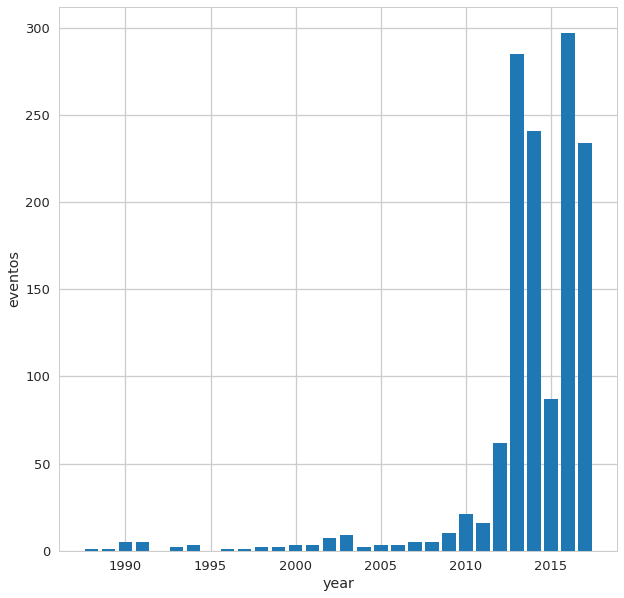

<class 'pandas.core.series.Series'>


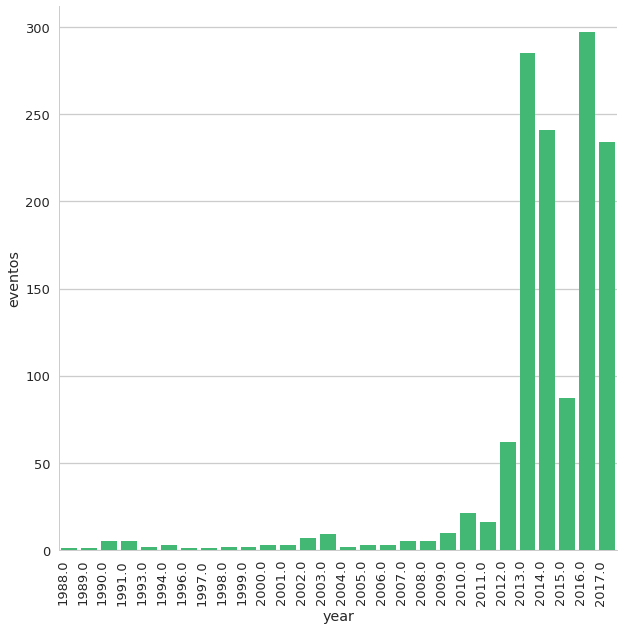

In [7]:
# Tenemos que contar para cada año la cantidad de eventos. Aprovechamos el ejemplo
yc=dataset.year.value_counts();
# Probemos un grafico simple usando matplotlib
plt.figure(figsize=(10,10))
plt.bar(yc.index,yc.values)
plt.xlabel('year');plt.ylabel('eventos')
plt.show()
# Veamos que tipo de dato es yc y lo ploteamos usando seaborn 
print(type(yc))
# Es un tipo Series de pandas, seaborn entiende dataframes y series pero seguimos el ejemplo.
ax = seaborn.barplot(data=yc.to_frame().reset_index(),
    x='index', y='year', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_xlabel('year');ax.set_ylabel('eventos')
ax.figure.set_size_inches(10,10)
seaborn.despine()
# Comentario: el correspondiente a matplotlib, parece mas claro en el sentido que preserva los nan (no los incluye,
# pero deja el espacio correspondiente en el grafico, mientras que el correspondiente a seaborn, con la configuracion
# default, parece quitarlos...)

### Solucion Ejercicio 1b/1c

In [8]:
#La tabla es similar a lo anterior pero tenemos que normalizar
ycnorm=dataset.year.value_counts(normalize=True) # por default dropnan=True!
ycpd=ycnorm.to_frame().reset_index().sort_values(['index'])
ycpd.reset_index(inplace=True,drop=True)
ycpd.columns=['year','pFreq']
#
ycpd.reset_index(drop=True,inplace=True)
ycpd

,year,pFreq
0,1988.0,0.000760
1,1989.0,0.000760
2,1990.0,0.003799
3,1991.0,0.003799
4,1993.0,0.001520
5,1994.0,0.002280
6,1996.0,0.000760
7,1997.0,0.000760
8,1998.0,0.001520
9,1999.0,0.001520


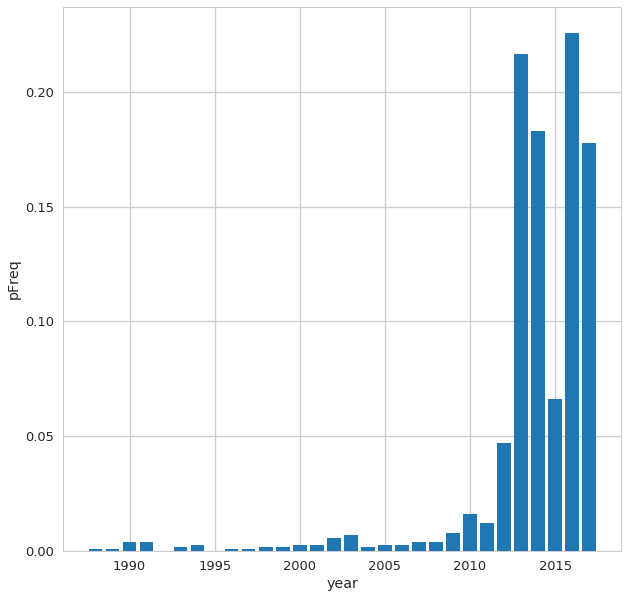

In [9]:
# Graficamos usando matplotlib
plt.figure(figsize=(10,10))
plt.bar(ycpd.year,ycpd.pFreq)
plt.xlabel('year');plt.ylabel('pFreq')
plt.show()

* ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

*Ambos graficos son similares pero NO iguales. Los dos tienen su utilidad dependiendo del dato que quiera entregar. Si deseo tener un rapido pantallazo de la cantidad absoluta de eventos de un dado año recurriria al primero de los graficos el cual muestra cantidad de cuentas. En el caso de que quiera obtener la contribucion frecuencial recurriria al segundo.*

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

*Si suponemos que la recoleccion de la informacion se efectuó de la misma manera y por los mismos organismos en todos los años mencionados, podriamos elaborar alguna clase de analisis. Caso contrario estariamos sacando conclusiones de intervalos temporales que no tuvieron el mismo tratamiento. Esto en realidad lo podriamos analizar usando el mismo dataset y contabilizando la cantidad de entidades en una dada fecha.
Pero dado el supuesto anterior la distribucion al menos en el intervalo (asimetrico) mostrado parece bimodal.
La cantidad de casos de violencia parecen haberse incrementado en los ultimos años, esto puede verse en cualquiera de los graficos elaborados, pero es mas notorio en el caso de magnitudes absolutas/cuentas.
Esto lo podemos observar tambien en el grafico siguiente:*

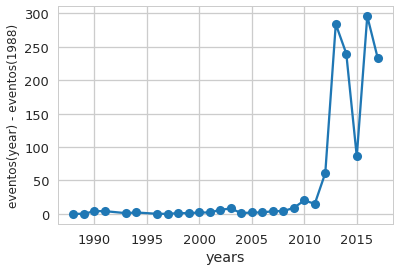

In [10]:
# yc contenia los valores de cuentas y años 
yc_ordered=yc.to_frame().reset_index().sort_values(['index'])
yc_ordered.columns=['year','eventos']
yc_ordered.reset_index(inplace=True,drop=True)
plt.figure
plt.plot(yc_ordered.year.values[:],yc_ordered.eventos.values[:]-yc_ordered.eventos.values[0],'-o')
plt.xlabel('years'); plt.ylabel('eventos(year) - eventos(1988)',fontsize=12)
plt.show()
# En la grafica utilizamos como linea base el primer año 1988, respecto a esto podemos ver que la cantidad de eventos
# se ha incrementado respecto al comienzo de la medicion. 

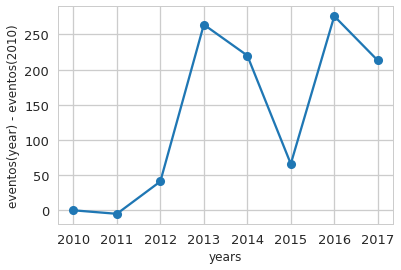

In [11]:
#Sinos concentramos respecto al 2010 por ejemplo
plt.figure
plt.plot(yc_ordered.year.values[20:],yc_ordered.eventos.values[20:]-yc_ordered.eventos.values[20],'-o')
plt.xlabel('years',fontsize=12); plt.ylabel('eventos(year) - eventos(2010)',fontsize=12)
plt.show()

*En la grafica anterior ya se observa una tendencia (al margen del descenso en 2015). Esto queda mas claro en la imagen siguiente*

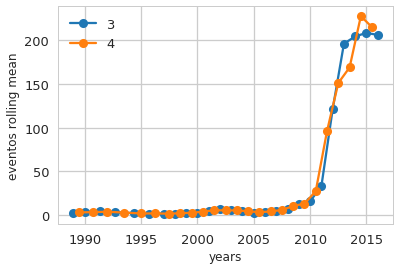

In [12]:
# Una forma alternativa de observar el incremento es utilizar un moving average
plt.figure
xrng=range(3,5)
for x in xrng:
    plt.plot(yc_ordered.rolling(x).mean().year,yc_ordered.rolling(x).mean().eventos,'-o')
plt.legend(xrng)
plt.xlabel('years',fontsize=12); plt.ylabel('eventos rolling mean',fontsize=12)
plt.show()
yc_ordered.columns=['year','eventos']
# Figura en la cual se ve (con una estructura similar a las anteriores) un notorio incremento. 

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

      year     pFreq  pFreqCumSum
0   1988.0  0.000760     0.000760
1   1989.0  0.000760     0.001520
2   1990.0  0.003799     0.005319
3   1991.0  0.003799     0.009119
4   1993.0  0.001520     0.010638
5   1994.0  0.002280     0.012918
6   1996.0  0.000760     0.013678
7   1997.0  0.000760     0.014438
8   1998.0  0.001520     0.015957
9   1999.0  0.001520     0.017477
10  2000.0  0.002280     0.019757
11  2001.0  0.002280     0.022036
12  2002.0  0.005319     0.027356
13  2003.0  0.006839     0.034195
14  2004.0  0.001520     0.035714
15  2005.0  0.002280     0.037994
16  2006.0  0.002280     0.040274
17  2007.0  0.003799     0.044073
18  2008.0  0.003799     0.047872
19  2009.0  0.007599     0.055471
20  2010.0  0.015957     0.071429
21  2011.0  0.012158     0.083587
22  2012.0  0.047112     0.130699
23  2013.0  0.216565     0.347264
24  2014.0  0.183131     0.530395
25  2015.0  0.066109     0.596505
26  2016.0  0.225684     0.822188
27  2017.0  0.177812     1.000000


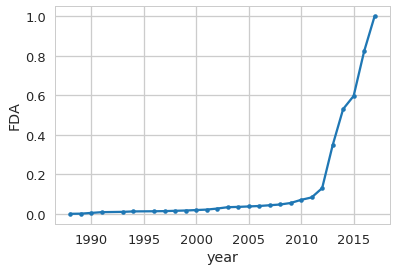

P(acto de violencia antes del cambio de gobierno):  0.596505
Esto es lo mismo que la FDA(2015): 0.596505



In [13]:
# La funcion de distribucion acumulada la calculamos en terminos de la pdf que ya habiamos utilizado y la dejamos 
# disponible en el data frame
ycpd['pFreqCumSum']=ycpd.pFreq.cumsum();
print(ycpd)
# Grafiquemos
plt.figure
plt.plot(ycpd.year,ycpd.pFreqCumSum,'.-')
plt.xlabel('year');plt.ylabel('FDA')
plt.show()
# La propabilidad de que se haya dado un acto de violencia antes del ultimo cambio de gobierno es lo mismo que 1-P(year>2015). Suponemos que el cambio
# se dio en 2016 puesto que no tenemos la discretizacion en terminos de meses
pAC=1-ycpd.pFreq[ycpd.year>2015].sum();
pACstr= 'P(acto de violencia antes del cambio de gobierno):  %f' % pAC 
print(pACstr)
fdastr='Esto es lo mismo que la FDA(2015): %f\n' % ycpd.pFreqCumSum[ycpd.year==2015].values
print(fdastr)

IMPORTANTE: ¿Qué hacemos con los datos faltantes?
En el proceso de cuenta los metodos (de pandas) los ignoran por defecto. Lo cual es razonable si conocemos esta situacion (es decir que debemos ser informados de los datos excluidos por este motivo). Eso significa que no es que estamos ignorando esa situacion, sino que en el caso de considerarla no podriamos asignarle una pertenencia. Por ejemplo aquellos eventos que no tienen un año asignado no significa que no existieron sino que no podemos asignarlo o contabilizarlos en un año en particular. 

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

In [14]:
# de https://stackoverflow.com/questions/37926248/how-to-remove-accents-from-values-in-columns
dataset['provincia']=dataset['provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# Cuentas Abolutas
yenc=dataset.provincia.value_counts() #dropnan=True por default
# Valores Normalizados
ypnorm=dataset.provincia.value_counts(normalize=True)
# Acomodamos el Data Frame
yppd=ypnorm.to_frame().reset_index().sort_values(['index'])
yppd.reset_index(inplace=True,drop=True)
yppd.columns=['provincia','pFreq']
yppd

,provincia,pFreq
0,Buenos Aires,0.693182
1,Catamarca,0.001420
2,Chaco,0.020597
3,Chubut,0.026278
4,Ciudad de Buenos Aires,0.083097
5,Cordoba,0.036932
6,Corrientes,0.003551
7,Entre Rios,0.006392
8,Formosa,0.007102
9,Jujuy,0.006392


* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?

*Seria conveniente normalizar las cuentas en funcion del tamaño de la poblacion de cada provincia. Asimismo se podria incorporar la evolución temporal.*

* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

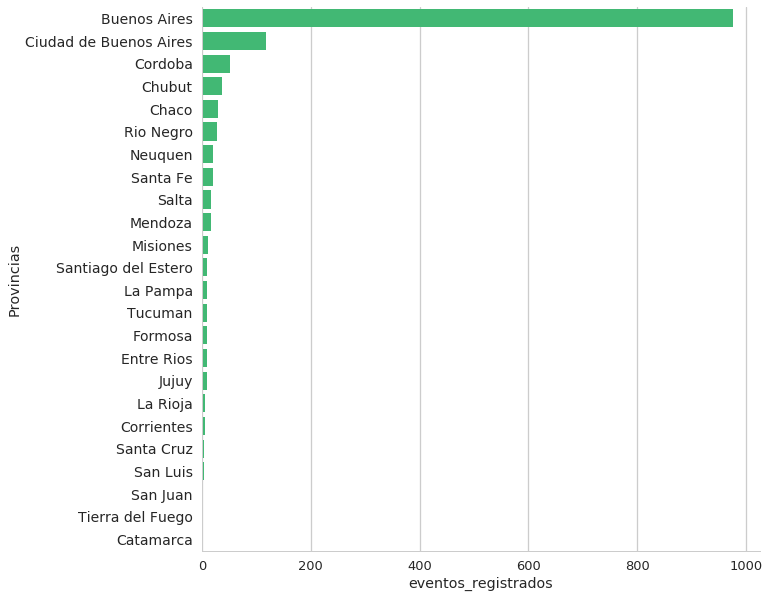

In [15]:
ax = seaborn.barplot(data=yenc.to_frame().reset_index(),
    x='provincia', y='index', color='#2ecc71')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right",fontsize=14)
ax.set_xlabel('eventos_registrados');ax.set_ylabel('Provincias')
ax.figure.set_size_inches(10,10)
seaborn.despine()

*Alternativamente se podria utilizar un estilo de heatmap geolocalizado. Es decir en el mapa de Argentina, ubicar cada provincia y utilizar un heatmap para tonalizarlo.*

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


### Sol Ejercicio 3a

In [16]:
# Antes de armar la tabla revisemos la consistencia de los datos.
print('Cantidad de eventos  (Y=provincia) con NaN: '+ str(sum(dataset.provincia.value_counts(dropna=False))))
print('Cantidad de eventos (X=año) con NaN: ' + str(sum(dataset.year.value_counts(dropna=False))))
print('Cantidad de eventos  (Y=provincia) quitando NaN: '+ str(sum(dataset.provincia.value_counts(dropna=True))))
print('Cantidad de eventos (X=año) quitando NaN: ' + str(sum(dataset.year.value_counts(dropna=True))))


Cantidad de eventos  (Y=provincia) con NaN: 1439
Cantidad de eventos (X=año) con NaN: 1439
Cantidad de eventos  (Y=provincia) quitando NaN: 1408
Cantidad de eventos (X=año) quitando NaN: 1316


*En esta instancia tenemos un par de opciones. Realizamos el filtrado de años y provincias de tal forma de eliminar aquellas instancias donde existan nan en alguna de las dos condiciones o en ambas. Es decir si tenemos casos (year,provincia), eliminamos aquellos (year,nan),(nan,provincia),(nan,nan). O simplemente utilizamos el conjunto total de datos y llevamos la informacion de los nan a cuestas.
Si tuvieramos datos completos esperariamos ver que las distribuciones marginales sean identicas, pero esto en la condicion actual puede no ocurrir puesto que cuando las tratamos en el ejercicio 1 por ejemplo un par (year,nan) hubiera sido aceptado, pero en el ejercicio 2 no hubiera sido considerada (igualmente para el caso inverso (nan, provincia)).*

In [17]:
pList=list(set(dataset.provincia.values))
pList.pop(pList.index(numpy.nan))
pList.sort()
auxDict={};
for i in range(0,len(pList)):
    ycnorm=dataset.year[dataset.provincia==pList[i]].value_counts()
    ycpd2=ycnorm.to_frame()
    auxDict[pList[i]]=ycpd2
    ypd=pandas.concat(auxDict.values(),axis=1)
ypd.columns=pList[:]
ypdSum=sum(ypd.sum())
ypdNew=pandas.DataFrame(data=ypd.values/ypdSum,columns=pList[:],index=ypd.index)

In [18]:
# Veamos las distribuciones marginales para provincias, suma sobre años
# Debe ser similar a la calculada en el Ejercicio 2 pero puede diferir en 
# cuanto en el ejercicio 2 contemplabamos casos (year,prov)=(nan,prov), mientras que aqui se filtraron
ypdNew.sum(axis=0) 

Buenos Aires              0.685057
Catamarca                 0.000766
Chaco                     0.022222
Chubut                    0.026054
Ciudad de Buenos Aires    0.085824
Cordoba                   0.039847
Corrientes                0.003065
Entre Rios                0.006897
Formosa                   0.007663
Jujuy                     0.005364
La Pampa                  0.007663
La Rioja                  0.004598
Mendoza                   0.012261
Misiones                  0.008429
Neuquen                   0.014559
Rio Negro                 0.019157
Salta                     0.012261
San Juan                  0.002299
San Luis                  0.002299
Santa Cruz                0.003065
Santa Fe                  0.014559
Santiago del Estero       0.007663
Tierra del Fuego          0.001533
Tucuman                   0.006897
dtype: float64

In [19]:
# Veamos las distribuciones marginales para años, suma sobre provincias
# Debe ser similar a la calculada en el Ejercicio 1 pero puede diferir en 
# cuanto en el ejercicio 1 contemplabamos casos (year,prov)=(year,nan), mientras que aqui se filtraron
ypdNew.sum(axis=1)

1988.0    0.000766
1989.0    0.000766
1990.0    0.003831
1991.0    0.003831
1993.0    0.001533
1994.0    0.002299
1996.0    0.000766
1997.0    0.000766
1998.0    0.001533
1999.0    0.000766
2000.0    0.002299
2001.0    0.002299
2002.0    0.005364
2003.0    0.006897
2004.0    0.001533
2005.0    0.002299
2006.0    0.002299
2007.0    0.003831
2008.0    0.003831
2009.0    0.007663
2010.0    0.016092
2011.0    0.012261
2012.0    0.046743
2013.0    0.214559
2014.0    0.181609
2015.0    0.066667
2016.0    0.227586
2017.0    0.179310
dtype: float64

In [20]:
# La tabla de doble entrada es:
ypdNew

,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad de Buenos Aires,Cordoba,Corrientes,Entre Rios,Formosa,Jujuy,...,Neuquen,Rio Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucuman
1988.0,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989.0,0.000766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990.0,NaN,NaN,0.003065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991.0,0.002299,NaN,NaN,NaN,0.001533,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.001533,NaN,NaN,NaN,NaN,NaN
1994.0,0.000766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000766,NaN,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN
1996.0,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN,NaN,NaN,...,0.000766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Veamos la visualizacion, quizas un heat map


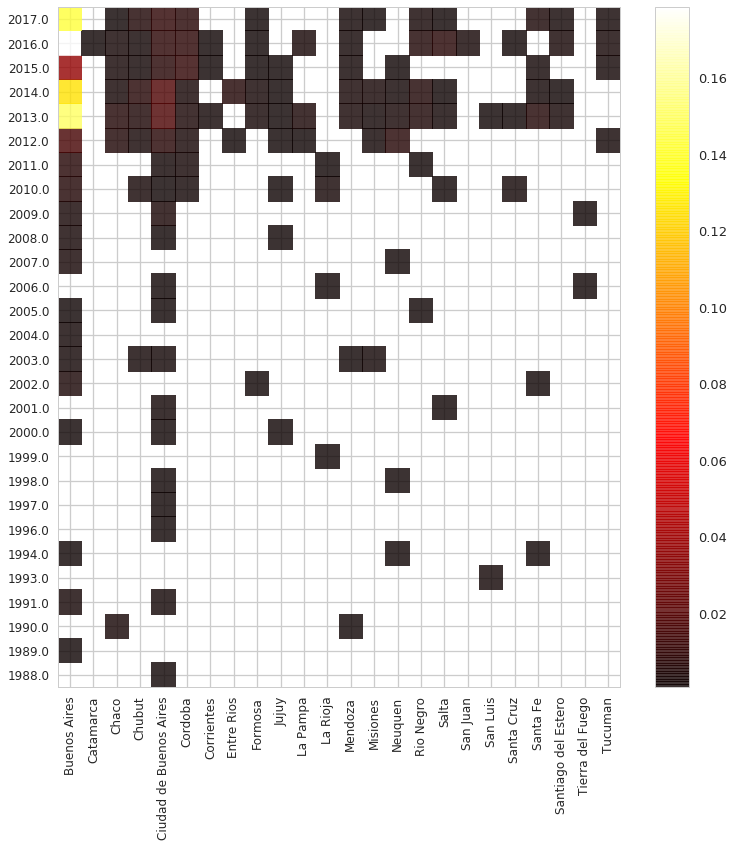

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
fig.subplots_adjust(bottom=0.25,left=0.25) # make room for labels
heatmap = ax.pcolormesh(ypdNew,alpha=0.8,cmap=plt.cm.hot)
cbar = plt.colorbar(heatmap)
headers=ypdNew.columns.tolist();

# Set ticks in center of cells
ax.set_xticks(numpy.arange(ypdNew.shape[1])+0.5, minor=False)
ax.set_yticks(numpy.arange(ypdNew.shape[0])+0.5, minor=False)

# Rotate the xlabels. Set both x and y labels 
ax.set_xticklabels(headers,rotation=90,fontsize=12)
ax.set_yticklabels(ypdNew.index,fontsize=12)
ax.grid(True)
plt.show()

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

### Sol Ejercicio 4

In [22]:
# Arreglamos el tema de acentos dentro de los strings, puesto que vamos a usarlos para filtrar
dataset['contexto1']=dataset['contexto1'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# Veamos que componen contexto1
depFullList=list(set(dataset.contexto1.tolist()))
depFullList.pop(depFullList.index(numpy.nan))
depFullList.sort()
for i in range(0,len(depFullList)):
    print (i,depFullList[i])

0 Centros de Alojamiento para Personas Menores de Edad
1 Centros de Detencion Preventiva
2 Centros de Detencion Previos al Juicio (Alcaidia)
3 Comisaria
4 Domicilio Particular
5 Escuelas de Formacion Fuerzas Nacionales
6 Escuelas de Formacion Fuerzas Provinciales
7 Espacio Publico
8 Establecimiento de Rehabilitacion de Adicciones
9 Establecimiento de Salud Mental
10 Hospital General
11 Instalaciones de la Gendarmeria Nacional
12 Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)
13 Lugar No Identificado
14 Moviles y medios de transporte de Fuerzas de Seguridad
15 Penal / Complejo Penitenciario FEDERAL
16 Penal / Complejo Penitenciario PROVINCIAL


In [23]:
#Armamos la lista para filtrar
reqList=list( depFullList[i] for i in [1, 3, 5,6,11,12,15,16])
reqList

['Centros de Detencion Preventiva',
 'Comisaria',
 'Escuelas de Formacion Fuerzas Nacionales',
 'Escuelas de Formacion Fuerzas Provinciales',
 'Instalaciones de la Gendarmeria Nacional',
 'Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)',
 'Penal / Complejo Penitenciario FEDERAL',
 'Penal / Complejo Penitenciario PROVINCIAL']

In [24]:
#Filtramos
pdNew=dataset.loc[dataset['contexto1'].isin(reqList)]
# La cantidad de eventos totales en contexto 1 la sacamos de
Pcp=float(sum(dataset.contexto1.value_counts()))
Pcf=float(pdNew.shape[0])
sout='La probabilidad es: %f' % float(Pcf/Pcp)
print(sout)

La probabilidad es: 0.789892


## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(N~~|~~M)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

### Sol Ejercicio 5

In [25]:
lst=list(set(dataset.violencia_fisica.tolist()))
lst.pop(lst.index(numpy.nan)) 
lst.pop(lst.index('Ninguno'))
lst.sort()
lst

['Asfixia, Caídas provocadas, Golpes',
 'Asfixia, Caídas provocadas, Golpes, Otras formas de maltrato físico',
 'Asfixia, Caídas provocadas, Quemaduras, Golpes, Heridas penetrantes, Sometimiento a posturas forzadas, Sometimiento a corriente eléctrica, Otras formas de maltrato físico',
 'Asfixia, Golpes',
 'Asfixia, Golpes, Otras formas de maltrato físico',
 'Asfixia, Golpes, Sometimiento a corriente eléctrica',
 'Asfixia, Golpes, Sometimiento a corriente eléctrica, Otras formas de maltrato físico',
 'Asfixia, Golpes, Sometimiento a posturas forzadas',
 'Asfixia, Muerte',
 'Asfixia, Muerte, Golpes, Privación de la libertad / Secuestro, Otras formas de maltrato físico',
 'Asfixia, Muerte, Golpes, Sometimiento a corriente eléctrica',
 'Caídas provocadas',
 'Caídas provocadas, Golpes',
 'Caídas provocadas, Golpes, Privación de la libertad / Secuestro, Otras formas de maltrato físico',
 'Caídas provocadas, Muerte, Heridas penetrantes',
 'Desaparición (forzada)',
 'Golpes',
 'Golpes, Desapar

In [26]:
#Filtramos aquellos con violencia fisica
pvf=dataset.loc[dataset['violencia_fisica'].isin(lst)]
pvf

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16,year
4,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN,2017.0
5,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,Alejamiento de vínculos,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN,2017.0
14,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Hurto / Robo de pertenencias,Golpes,NaN,NaN,"Denegación acceso atención médica, Falta de ad...",NaN,Servicio Penitenciario Provincial,UPP Nº 37 BARKER,NaN,2017.0
19,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Tránsito,Espacio Publico,NaN,NaN,Otras formas de maltrato físico,"Hostigamiento, Amenazas",Violación grupal,NaN,NaN,Servicio Penitenciario Provincial,Comisaria N° 1 de Avellaneda,NaN,2017.0
20,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Segregación / Confinamiento,Golpes,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP N° 30 de Alvear,NaN,2017.0
25,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Ciudad de Buenos Aires,Situaciones de Detención,Comisaria,NaN,NaN,"Golpes, Otras formas de maltrato físico",NaN,NaN,NaN,NaN,Policia Federal Argentina (PFA),NaN,NaN,2017.0
35,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2016,00",Cordoba,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,Hostigamiento,Otras formas de violencia sexual y/o de género,NaN,NaN,Servicio Penitenciario Provincial,Penal de Bouwer,NaN,2016.0
39,DNPCVI,Otro,Otros,"2017,00",Ciudad de Buenos Aires,Situaciones de Tránsito,Espacio Publico,NaN,NaN,Muerte,NaN,NaN,NaN,NaN,Policia Federal Argentina (PFA),NaN,NaN,2017.0
44,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Otras formas de maltrato físico,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP N° 36 de Magdalena,NaN,2017.0
49,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Cordoba,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,NaN,NaN,Falta de administración de medicación,NaN,Servicio Penitenciario Provincial,Penal de Cruz del Eje,NaN,2017.0


In [27]:
# Veamos de los casos con violencia fisica aquellos casos con violencia_psiquica

vslst=list(set(pvf.violencia_psiquica.tolist()))
vslst.pop(vslst.index(numpy.nan))
vslst.pop(vslst.index('Ninguno'))
vslst.sort()
vslst

['Ablandamiento',
 'Ablandamiento, Alejamiento de vínculos',
 'Ablandamiento, Amenazas',
 'Alejamiento de vínculos',
 'Alejamiento de vínculos, Disparos intimidatorios',
 'Amenazas',
 'Amenazas, Disparos intimidatorios',
 'Amenazas, Restricción injustificada de contacto',
 'Disparos intimidatorios',
 'Extorsión, forzamiento de la conducta, incitación a la violencia',
 'Extorsión, forzamiento de la conducta, incitación a la violencia, Amenazas',
 'Extorsión, forzamiento de la conducta, incitación a la violencia, Amenazas, Disparos intimidatorios',
 'Hostigamiento',
 'Hostigamiento, Amenazas',
 'Hostigamiento, Amenazas, Disparos intimidatorios',
 'Hostigamiento, Extorsión, forzamiento de la conducta, incitación a la violencia, Amenazas',
 'Hostigamiento, Otras formas de maltrato psicológico, Ablandamiento, Extorsión, forzamiento de la conducta, incitación a la violencia, Amenazas, Alejamiento de vínculos, Restricción injustificada de contacto',
 'Hostigamiento, Otras formas de maltrato p

In [28]:
# Volvamos a filtrar el dataset
pvfvs=pvf.loc[pvf['violencia_psiquica'].isin(vslst)]
pvfvs

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16,year
5,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,Alejamiento de vínculos,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN,2017.0
19,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Tránsito,Espacio Publico,NaN,NaN,Otras formas de maltrato físico,"Hostigamiento, Amenazas",Violación grupal,NaN,NaN,Servicio Penitenciario Provincial,Comisaria N° 1 de Avellaneda,NaN,2017.0
35,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2016,00",Cordoba,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,Hostigamiento,Otras formas de violencia sexual y/o de género,NaN,NaN,Servicio Penitenciario Provincial,Penal de Bouwer,NaN,2016.0
61,Juridicos Nacional,NaN,Personal,2013,Santa Fe,Situaciones de Detención,Domicilio Particular,NaN,NaN,"Muerte, Golpes",Hostigamiento,NaN,NaN,NaN,Policia Provincial,NaN,NaN,2013.0
103,Centro de Denuncias,SECRETARIA DE DDHH,Telefónica,2007,Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario FEDERAL,NaN,NaN,Golpes,Amenazas,Violación,NaN,NaN,Policia Federal Argentina (PFA),NaN,NaN,2007.0
112,Centro de Denuncias,SECRETARIA DE DDHH,Telefónica,2013,Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario FEDERAL,NaN,NaN,Heridas penetrantes,Amenazas,NaN,NaN,NaN,Servicio Penitenciario Federal,NaN,NaN,2013.0
144,Centro de Denuncias,SECRETARIA DE DDHH,Telefónica,2013,Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario FEDERAL,Requisa a familiares,NaN,Otras formas de maltrato físico,Otras formas de maltrato psicológico,NaN,NaN,NaN,Servicio Penitenciario Federal,COMPLEJO PENITENCIARIO FEDERAL I - EZEIZA,NaN,2013.0
145,Centro de Denuncias,SECRETARIA DE DDHH,Telefónica,2013,Formosa,Situaciones de Detención,Centros de Detencion Previos al Juicio (Alcaidia),NaN,Ninguno,Golpes,Amenazas,NaN,NaN,NaN,Policia Provincial,NaN,NaN,2013.0
162,Centro de Denuncias,SECRETARIA DE DDHH,Telefónica,2013,Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario FEDERAL,NaN,NaN,Otras formas de maltrato físico,Otras formas de maltrato psicológico,NaN,NaN,NaN,Servicio Penitenciario Federal,SPF - U.19 COLONIA PENAL DE EZEIZA,NaN,2013.0
182,Centro de Denuncias,SECRETARIA DE DDHH,Telefónica,NaN,Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario FEDERAL,NaN,NaN,Golpes,Ablandamiento,NaN,NaN,NaN,Servicio Penitenciario Federal,NaN,NaN,NaN


In [29]:
# Ahora con ambos dataframe, contemos aquellos con N:violencia_psiquica y fisica
pvf_vp_val=float(pvfvs.shape[0]) # Aquellos que dado que tienen violencia fisica tambien tienen violencia psiquica
pvf_val=float(pvf.shape[0]) # Todos los casos con violencia fisica
sout='La probabilidad es: %f' % float(pvf_vp_val/pvf_val)
print(sout)

La probabilidad es: 0.211966


* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?

De los datos provisto podemos ver que la violencia fisica no viene estrechamente relacionada a violencia psiquica (un 20% de los casos compartian ambos contextos).

* ¿Podemos concluir en que son eventos independientes dadas las muestras?

In [30]:
# Para ver si son eventos independientes contemos
evtNum=dataset.shape[0]
datasize='Tamaño del set: ' + str(evtNum)
print(datasize)
# La cantidad de eventos con violencia fisica ya la habiamos contado en el punto anterior
str_vf= 'Cantidad de eventos violencia fisica: ' + str(pvf_val)
print(str_vf)

Tamaño del set: 1439
Cantidad de eventos violencia fisica: 585.0


In [31]:
# tenemos que contar los casos con violencia psiquica
# Volvamos a filtrar el dataset
pvs=dataset.loc[dataset['violencia_psiquica'].isin(vslst)]
pvs

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16,year
3,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Comisaria,NaN,"Mala alimentación, Malas condiciones de alojam...",NaN,Alejamiento de vínculos,NaN,NaN,NaN,Policia Provincial,Comisaria Nº 3 de Rafael Castillo,NaN,2017.0
5,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,Alejamiento de vínculos,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN,2017.0
7,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,Alejamiento de vínculos,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN,2017.0
9,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,Otras formas de maltrato psicológico,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 42 de Florencio Varela,NaN,2017.0
19,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Tránsito,Espacio Publico,NaN,NaN,Otras formas de maltrato físico,"Hostigamiento, Amenazas",Violación grupal,NaN,NaN,Servicio Penitenciario Provincial,Comisaria N° 1 de Avellaneda,NaN,2017.0
24,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Segregación / Confinamiento,NaN,Otras formas de maltrato psicológico,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP N° 2 Sierra Chica,NaN,2017.0
31,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,Ablandamiento,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP N° 35 Magdalena,NaN,2017.0
33,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Chubut,Situaciones de Detención,Penal / Complejo Penitenciario FEDERAL,NaN,NaN,NaN,Alejamiento de vínculos,NaN,NaN,NaN,Servicio Penitenciario Federal,UPF N° 6 Rawson,NaN,2017.0
35,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2016,00",Cordoba,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,Hostigamiento,Otras formas de violencia sexual y/o de género,NaN,NaN,Servicio Penitenciario Provincial,Penal de Bouwer,NaN,2016.0
50,DNPCVI,SECRETARIA DE DDHH,Telefónica,NaN,Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,Restricción injustificada derechos al trabajo ...,NaN,NaN,NaN,Servicio Penitenciario Federal,NaN,NaN,NaN


In [32]:
# La cantidad de eventos con violencia psiquica 
pvs_val=pvs.shape[0]
str_vs= 'Cantidad de eventos violencia psiquica: ' + str(pvs_val)
print(str_vs)

Cantidad de eventos violencia psiquica: 444


In [33]:
# Entonces podemos armar
pvf_val_p=pvf_val/evtNum;
str_vf_p= 'P(violencia fisica): ' + str(pvf_val_p)
print(str_vf_p)
pvs_val_p=pvs_val/evtNum;
str_vs_p= 'P(violencia psiquica): ' + str(pvs_val_p)
print(str_vs_p)

P(violencia fisica): 0.4065323141070188
P(violencia psiquica): 0.3085476025017373


Para el caso de eventos independientes deberia ser cumplirse que $$P(N~~|~~M)=P(N)$$, es decir que tener o no violencia fisica no impacta, en tener violencia psiquica.

In [34]:
# De calculos anteriores sacamos que 
print('P(N|M) = '+ str(float(pvf_vp_val/pvf_val)))
#pero
print('P(N) = '+ str(pvs_val_p))

P(N|M) = 0.21196581196581196
P(N) = 0.3085476025017373


Es decir $P(N|M)\neq P(N)$ y los eventos no son independientes.